In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading in Data

In [2]:
xb_predictions = pd.read_csv('xg_probabilities.csv')
xb_predictions = xb_predictions.drop(columns = 'Unnamed: 0')

In [3]:
xb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']
xb_predictions['predicted'] = xb_predictions['predicted'].replace(0, 'negative')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(1, 'neutral')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(2, 'positive')

xb_predictions['true'] = xb_predictions['true'].replace(0, 'negative')
xb_predictions['true'] = xb_predictions['true'].replace(1, 'neutral')
xb_predictions['true'] = xb_predictions['true'].replace(2, 'positive')

In [4]:
xb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.232023,0.450890,0.317087,neutral,positive
1,0.130087,0.340344,0.529569,positive,positive
2,0.289366,0.441961,0.268673,neutral,negative
3,0.113783,0.301331,0.584886,positive,positive
4,0.215013,0.531860,0.253127,neutral,neutral


In [5]:
mnb_predictions = pd.read_csv('mnb_probabilities.csv')
mnb_predictions = mnb_predictions.drop(columns = 'Unnamed: 0')

In [6]:
mnb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [7]:
mnb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.190527,0.468783,0.340690,neutral,positive
1,0.120005,0.345362,0.534633,positive,positive
2,0.313668,0.329554,0.356778,positive,negative
3,0.215658,0.264383,0.519960,positive,positive
4,0.291138,0.523759,0.185103,neutral,neutral


In [8]:
rf_predictions = pd.read_csv('rf_probabilities.csv')
rf_predictions = rf_predictions.drop(columns = 'Unnamed: 0')

In [9]:
rf_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [10]:
rf_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.332379,0.360841,0.306780,neutral,positive
1,0.316833,0.348825,0.334343,neutral,positive
2,0.335792,0.355133,0.309075,neutral,negative
3,0.296466,0.327884,0.375651,positive,positive
4,0.329379,0.366357,0.304264,neutral,neutral


### Reshaping data for visualization

In [11]:
#True vs. Predicted
xb_pred_counts = xb_predictions.groupby(['true', 'predicted']).size().reset_index()
rf_pred_counts = rf_predictions.groupby(['true', 'predicted']).size().reset_index()
mnb_pred_counts = mnb_predictions.groupby(['true', 'predicted']).size().reset_index()

In [12]:
xb_pred_counts

,true,predicted,0
0,negative,negative,876
1,negative,neutral,1338
2,negative,positive,226
3,neutral,negative,208
4,neutral,neutral,2971
5,neutral,positive,388
6,positive,negative,195
7,positive,neutral,1513
8,positive,positive,2035


In [13]:
rf_pivot = rf_pred_counts.pivot(index='true', columns='predicted', values=0)
mnb_pivot = mnb_pred_counts.pivot(index='true', columns='predicted', values=0)
xb_pivot = xb_pred_counts.pivot(index='true', columns='predicted', values=0)

In [72]:
colors = ['powderblue', 'indianred', 'lightgrey']

''

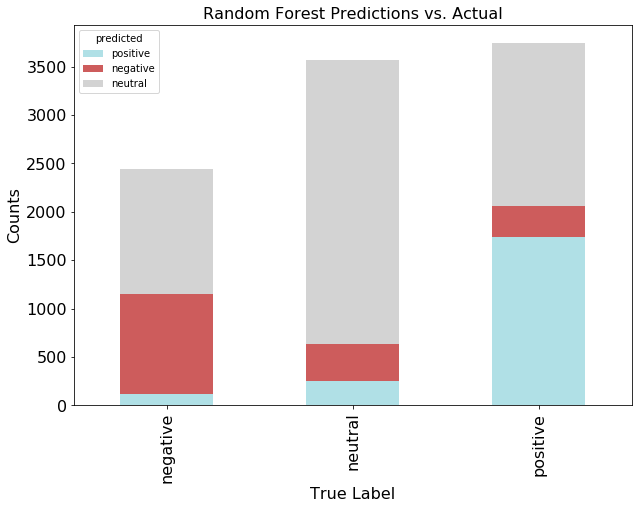

In [15]:
rf_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Random Forest Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('RF_predictions.jpeg')
;

''

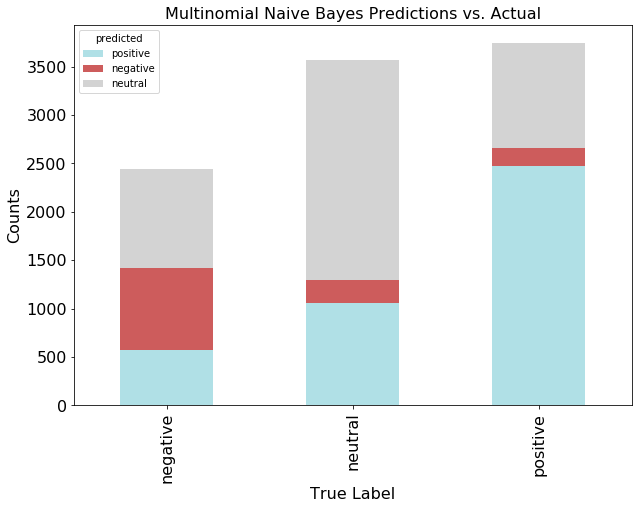

In [16]:
mnb_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('MNB_predictions.jpeg')
;

''

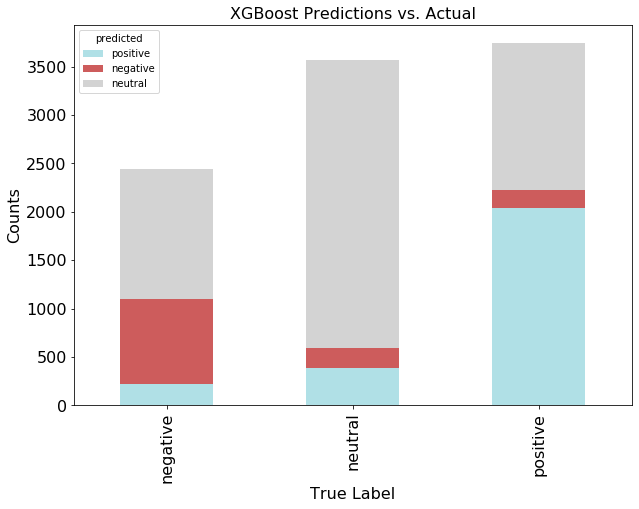

In [17]:
xb_pivot.loc[:,['positive','negative', 'neutral']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('XGBoost Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('XGB_predictions.jpeg')
;

In [18]:
mnb_pct = mnb_pivot
mnb_pct['total'] = mnb_pct['negative'] + mnb_pct['positive'] + mnb_pct['neutral']
mnb_pct['negative_pred'] = mnb_pct['negative']/mnb_pct['total'] * 100
mnb_pct['positive_pred'] = mnb_pct['positive']/mnb_pct['total'] * 100
mnb_pct['neutral_pred'] = mnb_pct['neutral']/mnb_pct['total'] * 100
mnb_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,844,1020,576,2440,34.590164,23.606557,41.803279
neutral,245,2269,1053,3567,6.868517,29.520606,63.610877
positive,184,1084,2475,3743,4.915843,66.123430,28.960727


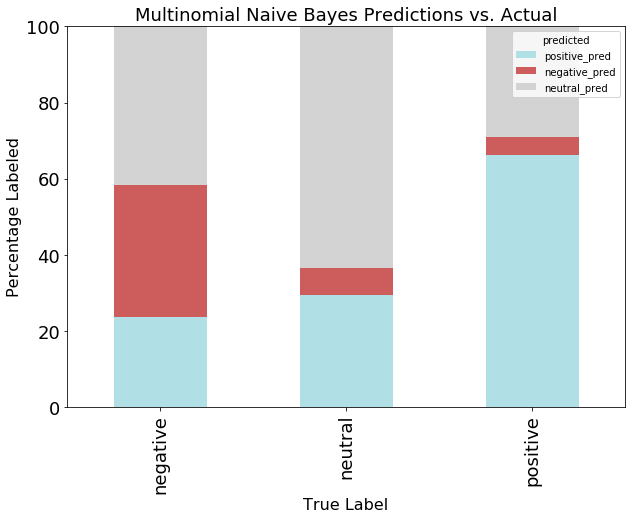

In [19]:
mnb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('MNB_predictions_pct.jpeg')
plt.ylim(0, 100);

In [20]:
rf_pct = rf_pivot
rf_pct['total'] = rf_pct['negative'] + rf_pct['positive'] + rf_pct['neutral']
rf_pct['negative_pred'] = rf_pct['negative']/rf_pct['total'] * 100
rf_pct['positive_pred'] = rf_pct['positive']/rf_pct['total'] * 100
rf_pct['neutral_pred'] = rf_pct['neutral']/rf_pct['total'] * 100
rf_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,1030,1291,119,2440,42.213115,4.877049,52.909836
neutral,376,2937,254,3567,10.541071,7.120830,82.338099
positive,321,1681,1741,3743,8.576009,46.513492,44.910500


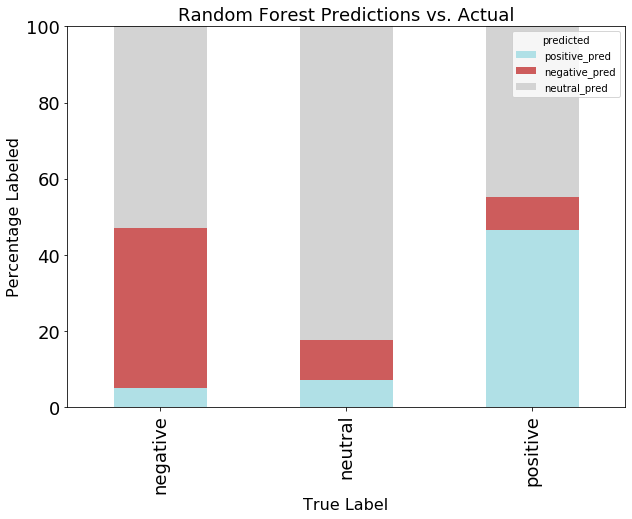

In [21]:
rf_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Random Forest Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('RF_predictions_pct.jpeg')
plt.ylim(0, 100);

In [22]:
xb_pct = xb_pivot
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100
xb_pct

predicted,negative,neutral,positive,total,negative_pred,positive_pred,neutral_pred
true,,,,,,,
negative,876,1338,226,2440,35.901639,9.262295,54.836066
neutral,208,2971,388,3567,5.831231,10.877488,83.291281
positive,195,1513,2035,3743,5.209725,54.368154,40.422121


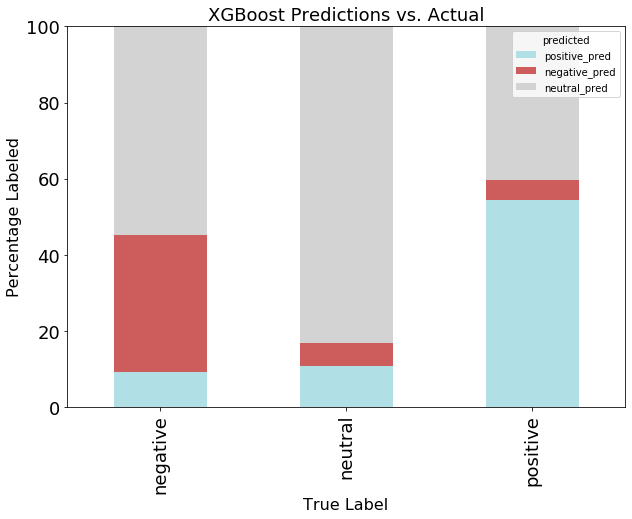

In [23]:
xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('../images/XGB_predictions_pct.jpeg')
plt.ylim(0, 100);

## Comparing Across Models

In [33]:
comp = pd.read_csv('model_comparison.csv')

In [34]:
comp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,Negative Precision,Neutral Precision,Positive Precision,Macro-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Macro-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Macro-avg F1-Score,Avg Accuracy,ROC_AUC_Score
1,Multi.Naive.Bayes,0.66,0.52,0.6,0.59,0.35,0.64,0.66,0.55,0.45,0.57,0.63,0.55,0.57,0.757
2,XGBoost,0.68,0.51,0.77,0.65,0.36,0.83,0.54,0.58,0.47,0.63,0.64,0.58,0.6,0.768
3,RandForest,0.6,0.5,0.82,0.64,0.42,0.83,0.47,0.57,0.5,0.62,0.6,0.57,0.59,0.761
4,Multi.Perceptron,0.52,0.6,0.52,0.54,0.55,0.6,0.46,0.54,0.53,0.6,0.49,0.54,0.55,0.703


In [35]:
#Import model comparison statistics from csv

new_header = comp.iloc[0] #grab the first row for the header
comp = comp[1:] #take the data less the header row
comp.columns = new_header
comp.columns = ['Model',  'Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Macro-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Macro-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Macro-avg F1-Score',        'Avg Accuracy', 'ROC AUC Score']
comp.head()


,Model,Negative Precision,Neutral Precision,Positive Precision,Macro-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Macro-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Macro-avg F1-Score,Avg Accuracy,ROC AUC Score
1,Multi.Naive.Bayes,0.66,0.52,0.6,0.59,0.35,0.64,0.66,0.55,0.45,0.57,0.63,0.55,0.57,0.757
2,XGBoost,0.68,0.51,0.77,0.65,0.36,0.83,0.54,0.58,0.47,0.63,0.64,0.58,0.6,0.768
3,RandForest,0.6,0.5,0.82,0.64,0.42,0.83,0.47,0.57,0.5,0.62,0.6,0.57,0.59,0.761
4,Multi.Perceptron,0.52,0.6,0.52,0.54,0.55,0.6,0.46,0.54,0.53,0.6,0.49,0.54,0.55,0.703


In [53]:
float_cols = ['Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Macro-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Macro-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Macro-avg F1-Score',        'Avg Accuracy', 'ROC AUC Score']
comp[float_cols] = comp[float_cols].astype(float)


/Users/jamiewessels/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


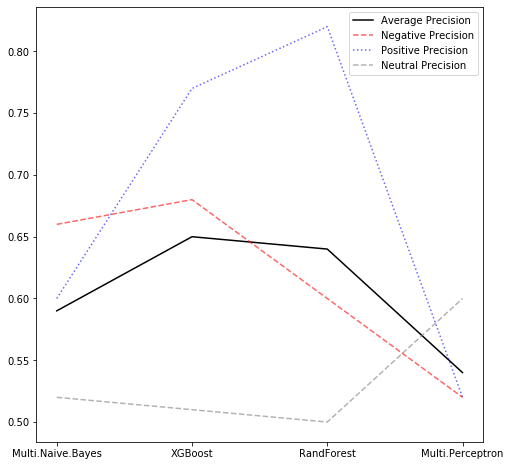

In [38]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
ax.plot(comp['Model'], comp['Negative Precision'], color = 'red', label = 'Negative Precision', alpha = 0.6, linestyle='dashed')
ax.plot(comp['Model'], comp['Positive Precision'], color = 'blue', label = 'Positive Precision', alpha = 0.6, linestyle='dotted')
ax.plot(comp['Model'], comp['Neutral Precision'], color = 'gray', label = 'Neutral Precision', alpha = 0.6, linestyle='--')

ax.legend()
# ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'red', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'blue', label = 'Average Precision')

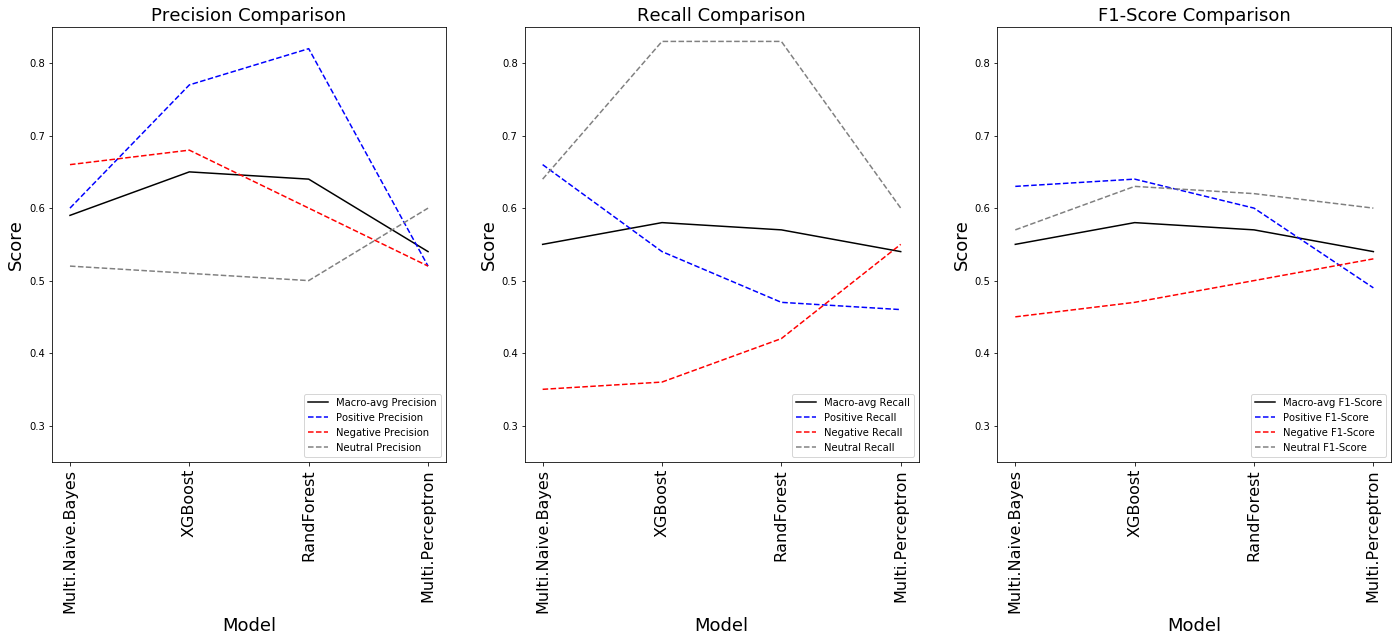

In [71]:
groups = ['Macro-avg', 'Positive', 'Negative', 'Neutral']
metrics = ['Precision', 'Recall', 'F1-Score']
cols = ['black', 'blue', 'red', 'gray']
linestyles = ['solid', 'dashed', 'dashed', 'dashed']
titles = ['Precision Comparison', 'Recall Comparison', 'F1-Score Comparison']

fig, axs = plt.subplots(1,3, figsize = (24,8))


for ax, met, title in zip(axs.flatten(), metrics, titles):
    for gr, col, ls in zip(groups, cols, linestyles): 
        ax.plot(comp['Model'], comp[f'{gr} {met}'], color = col, label = f'{gr} {met}', linestyle = ls)
        ax.legend(loc = 4)
        ax.set_xticklabels(comp['Model'],fontsize = 16, rotation = 90)
    ax.set_title(title , fontsize = 18)
    ax.set_ylim(0.25,0.85)
    ax.set_xlabel('Model', fontsize = 18)
    ax.set_ylabel('Score', fontsize = 18)

fig.savefig('../images/Model_comparison.jpeg')

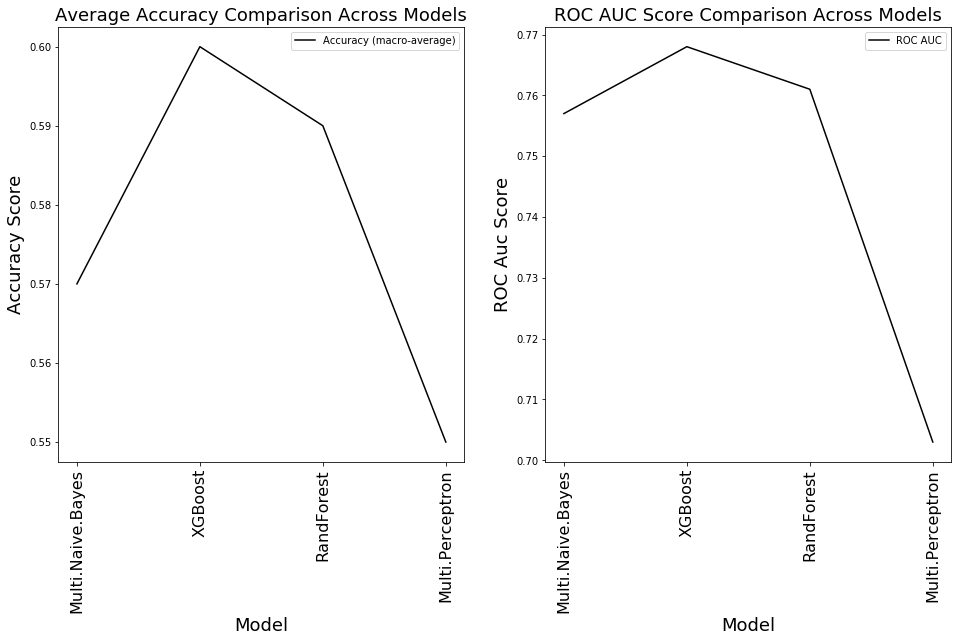

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (16,8))


ax[0].plot(comp['Model'], comp['Avg Accuracy'], color = 'black', label = 'Accuracy (macro-average)')
ax[0].set_xticklabels(comp['Model'],fontsize = 16 ,rotation = 90)
ax[0].set_title('Average Accuracy Comparison Across Models' , fontsize = 18)
ax[0].set_xlabel('Model', fontsize = 18)
ax[0].set_ylabel('Accuracy Score', fontsize = 18)
ax[0].legend()

ax[1].plot(comp['Model'], comp['ROC AUC Score'], color = 'black', label = 'ROC AUC')
ax[1].set_xticklabels(comp['Model'],fontsize = 16 ,rotation = 90)
ax[1].set_title('ROC AUC Score Comparison Across Models' , fontsize = 18)
ax[1].set_xlabel('Model', fontsize = 18)
ax[1].set_ylabel('ROC Auc Score', fontsize = 18)
ax[1].legend()
fig.savefig('../images/Accuracy_roc_comparison.jpeg');


## Looking at Threshold

Observation: XGBoost does really gooda t predicting neutral correctly and okay at predicting positive.  But a lot of the true negatives are labeled as neutral.  A good amount of the ture positives are also labeled as neutral.

Random forest has same issue but is better at detecting true negatives than other models.


In [61]:
#Look at true negatives

xb_tn = xb_predictions[xb_predictions['true']=='negative']
xb_tn.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
2,0.289366,0.441961,0.268673,neutral,negative
5,0.219468,0.429542,0.350990,neutral,negative
13,0.536621,0.225788,0.237591,negative,negative
14,0.840751,0.085158,0.074091,negative,negative
16,0.286313,0.443859,0.269827,neutral,negative


In [63]:
colors2 = ['indianred', 'lightgrey', 'powderblue' ]

In [64]:
num_array = LabelEncoder().fit_transform(xb_tn['predicted'])
color_preds = np.array(colors2)[num_array]

''

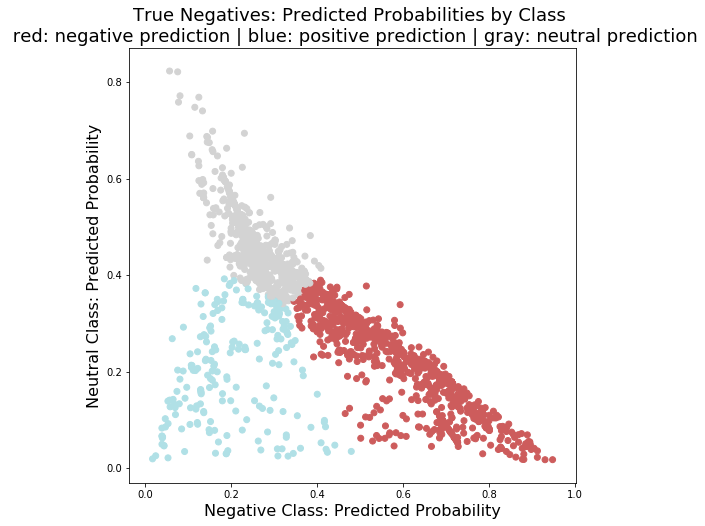

In [66]:
#Plot shows True Negatives
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_tn['negative_prob'], xb_tn['neutral_prob'], color = color_preds)
ax.set_title('True Negatives: Predicted Probabilities by Class \n red: negative prediction | blue: positive prediction | gray: neutral prediction', fontsize = 18)
ax.set_xlabel('Negative Class: Predicted Probability', fontsize = 16)
ax.set_ylabel('Neutral Class: Predicted Probability', fontsize = 16)
fig.savefig('../images/True_negatives.jpeg')
;


What would happen if we set a threshold for negative class if probability was higher than 0.2? 

In [67]:
xb_neg_thresh = xb_predictions

In [68]:
xb_neg_thresh['adj_pred'] = np.where(xb_neg_thresh['negative_prob']>0.25, 'negative', xb_neg_thresh['predicted'])

In [70]:
colors

['black', 'blue', 'red', 'gray']

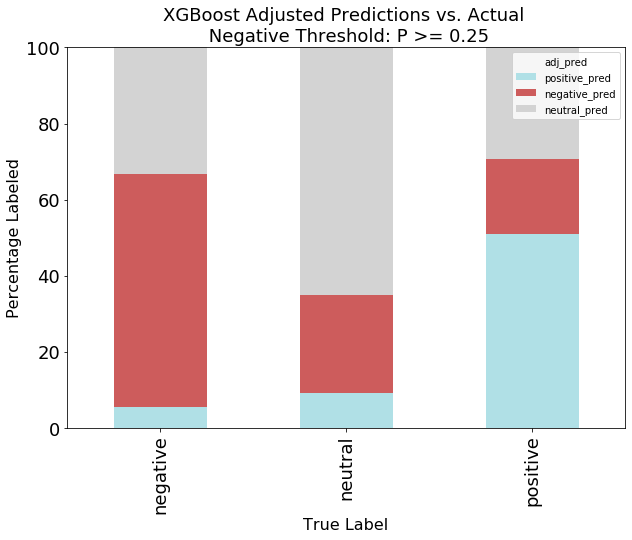

In [73]:
xb_adj_counts = xb_neg_thresh.groupby(['true', 'adj_pred']).size().reset_index()
xb_pivot_adj = xb_adj_counts.pivot(index='true', columns='adj_pred', values=0)

xb_pct = xb_pivot_adj
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100


xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold: P >= 0.25', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('../images/XGB_predictions_adjusted.jpeg')
plt.ylim(0, 100);

#What if we Lowered the threshold for calling something neutral? 


''

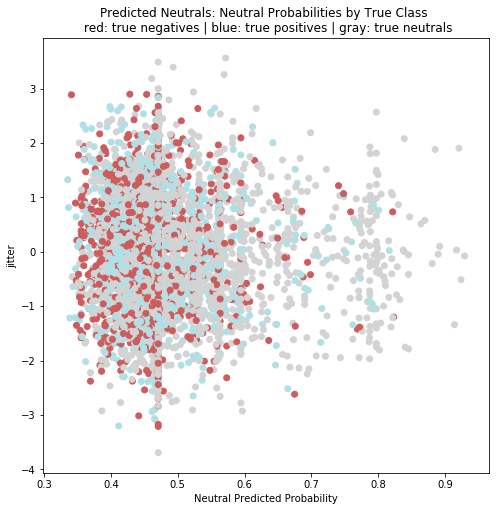

In [74]:
#data of everything labeled neutral
xb_neut_label = xb_predictions[xb_predictions['predicted']=='neutral']

num_array = LabelEncoder().fit_transform(xb_neut_label['true'])
color_true = np.array(colors2)[num_array]


#Plot shows Predicted Neutrals.  Colors represent true values

jitter =np.random.normal(size = len(num_array))

fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_neut_label['neutral_prob'], jitter, color = color_true)
ax.set_title('Predicted Neutrals: Neutral Probabilities by True Class \n red: true negatives | blue: true positives | gray: true neutrals')
ax.set_xlabel('Neutral Predicted Probability')
ax.set_ylabel('jitter')
fig.savefig('../images/predicted_neutrals.jpeg')
;

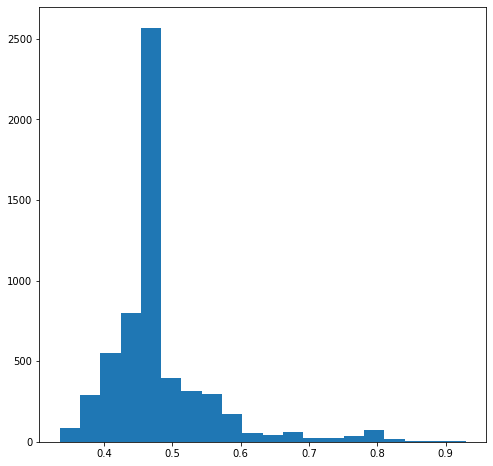

In [75]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.hist(xb_neut_label['neutral_prob'], bins = 20);

What if we only predict neutral if the neutral predicted probability is above 0.45? 

In [76]:
neut_thresh = xb_predictions


p_or_n = np.where(neut_thresh['negative_prob']>neut_thresh['positive_prob'], 'negative', 'positive')

neut_thresh['p_or_n'] = p_or_n

neut_thresh['neut_wt_pred'] = np.where(neut_thresh['neutral_prob']<0.40, p_or_n, xb_neg_thresh['adj_pred'])
neut_thresh = neut_thresh.drop(columns = ['p_or_n'])

neut_thresh

,negative_prob,neutral_prob,positive_prob,predicted,true,adj_pred,neut_wt_pred
0,0.232023,0.450890,0.317087,neutral,positive,neutral,neutral
1,0.130087,0.340344,0.529569,positive,positive,positive,positive
2,0.289366,0.441961,0.268673,neutral,negative,negative,negative
3,0.113783,0.301331,0.584886,positive,positive,positive,positive
4,0.215013,0.531860,0.253127,neutral,neutral,neutral,neutral
...,...,...,...,...,...,...,...
9745,0.243082,0.470746,0.286172,neutral,neutral,neutral,neutral
9746,0.072839,0.770668,0.156493,neutral,neutral,neutral,neutral
9747,0.236406,0.470797,0.292798,neutral,neutral,neutral,neutral
9748,0.252161,0.465099,0.282739,neutral,neutral,negative,negative


In [77]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)


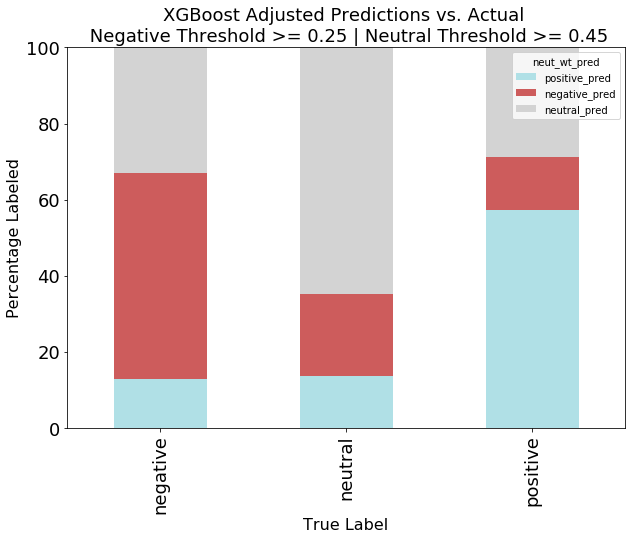

In [80]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)

xb_pct = xb_pivot_neut
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100


xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold >= 0.25 | Neutral Threshold >= 0.45', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('../images/XGB_predictions_adjusted_neutral_weight.jpeg')
plt.ylim(0, 100);